
### Disciplina: Processamento Digital de Sinais
### Docente: Cleison Silva
### Discente: Gislenne da Silva Moia   Matrícula: 201733840033
<center><img src = https://certi.org.br/blog/wp-content/uploads/2017/11/shutterstock_452249920-1.jpg></center>

----------
# <center> **Análise de Sinais Biomédicos**
----------


# **Análise de Sinal biomédico do Eletrocardiograma (ECG) através da linguagem de programação Python**

### **Objetivos**

1. Fazer a leitura do sinal e realizar os ajustes necessários para realização da análise;
2. Fazer a análise do sinal bruto, juntamente com seu espectro e fase;	
3. Aplicar os conceitos/equações de processamento;
4. Aplicação de filtros para ajuste do sinal;
5. Comparar o sinal após aplicação do filtro desenvolvido com o sinal filtrado disponível na base de dados;

### **Configuração Inicial**

A base de dados ECG - ID foi obtida através da plataforma [PhysioBank ATM](https://physionet.org/)

[Dados](https://archive.physionet.org/cgi-bin/atm/ATM) especificado


### **Detalhes**


Importe os pacotes `csv`, `numpy`, `matplotlib` e `scipy`.

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sosfilt, zpk2sos, iirfilter, sosfreqz

Importação do arquivo para leitura;

  Neste bloco é feito também o tratamento do arquivo, visto que as duas primeiras linhas não são dados que estarão sendo utilizado na análise (tempo, valores de tensão(Amplitude)).

  Ademais, é feita a conversão do array de string para valores em float;  


In [ ]:
FILE = '/content/samples.csv'
try:
    with open(FILE) as f:
        reader = csv.reader(f)
        data = np.array(list(reader))
        labels = data[0, :]
        units = data[1, :]
        t = data[2:, 0]
        x = data[2:, 1]
except FileExistsError:
    print("Arquivo não encontrado")
t = np.vectorize(float)(t)
x = np.vectorize(float)(x)

### **Plotando o sinal após os devidos tratamento para início da análise**

Observa-se que a primeira análise o sinal contém ruídos, dificultando a interpretação do mesmo; 

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(t, x) # gráfico 
plt.xlabel('tempo (s)') # eixo x
plt.ylabel('amplitude') # eixo y
plt.title('ECG - ID') # título
plt.show()

Tamanho da entrada

In [ ]:
N = len(t)
print(N)

5000


Cálculo do período da amostragem

Por ser igualmente espaçado, foi feita só a diferença entre o segundo e o primeiro

In [ ]:
Ts = t[1] - t[0]
print(Ts)

0.002


Frequencia (Hz)

In [ ]:
Fs = 1 / Ts
print(Fs)

500.0


### **Plotagem Gráfica**

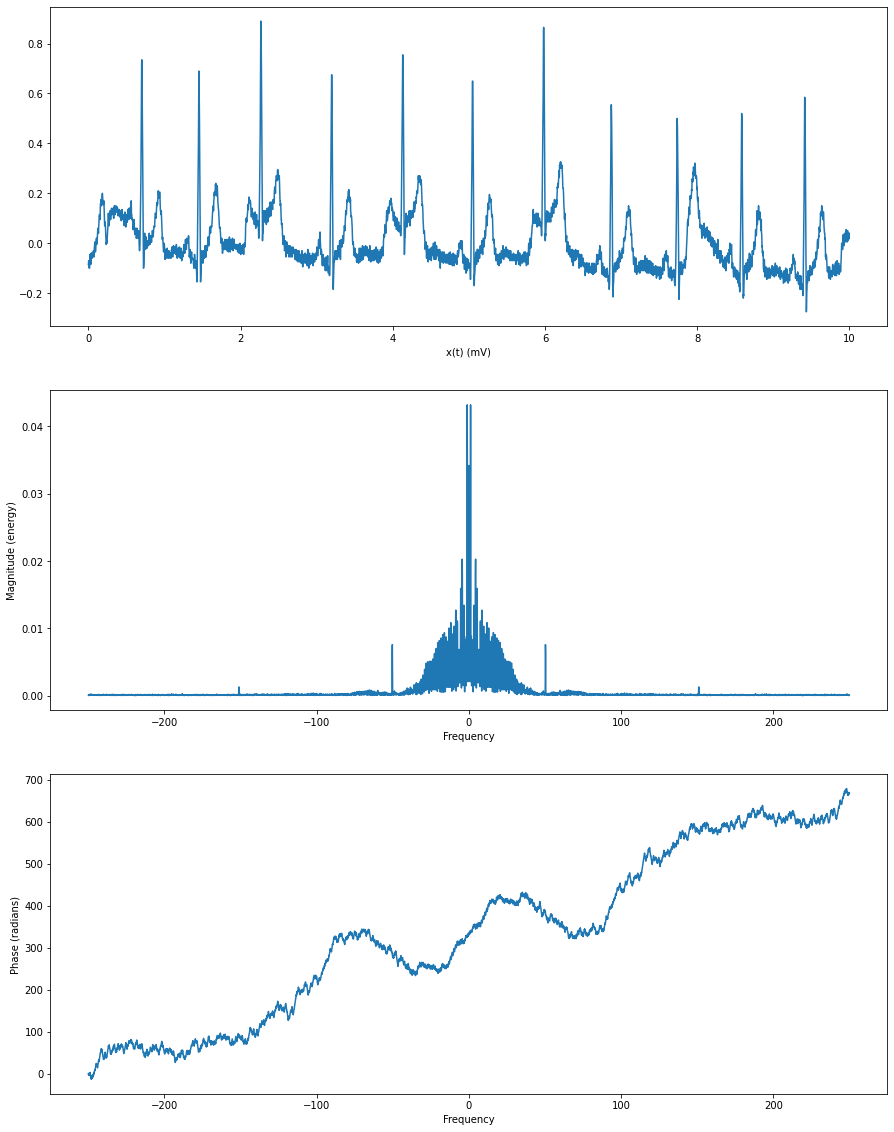

In [ ]:
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 20), sharex='row', sharey='row')
axes1[0].plot(t, x)
axes1[0].set_xlabel('t(s)')
axes1[0].set_xlabel('x(t) (mV)')
axes1[1].magnitude_spectrum(x, Fs=Fs, sides = 'twosided')
axes1[2].phase_spectrum(x, Fs=Fs, sides = 'twosided')
plt.show()

### **Desenvolvimento dos filltros**

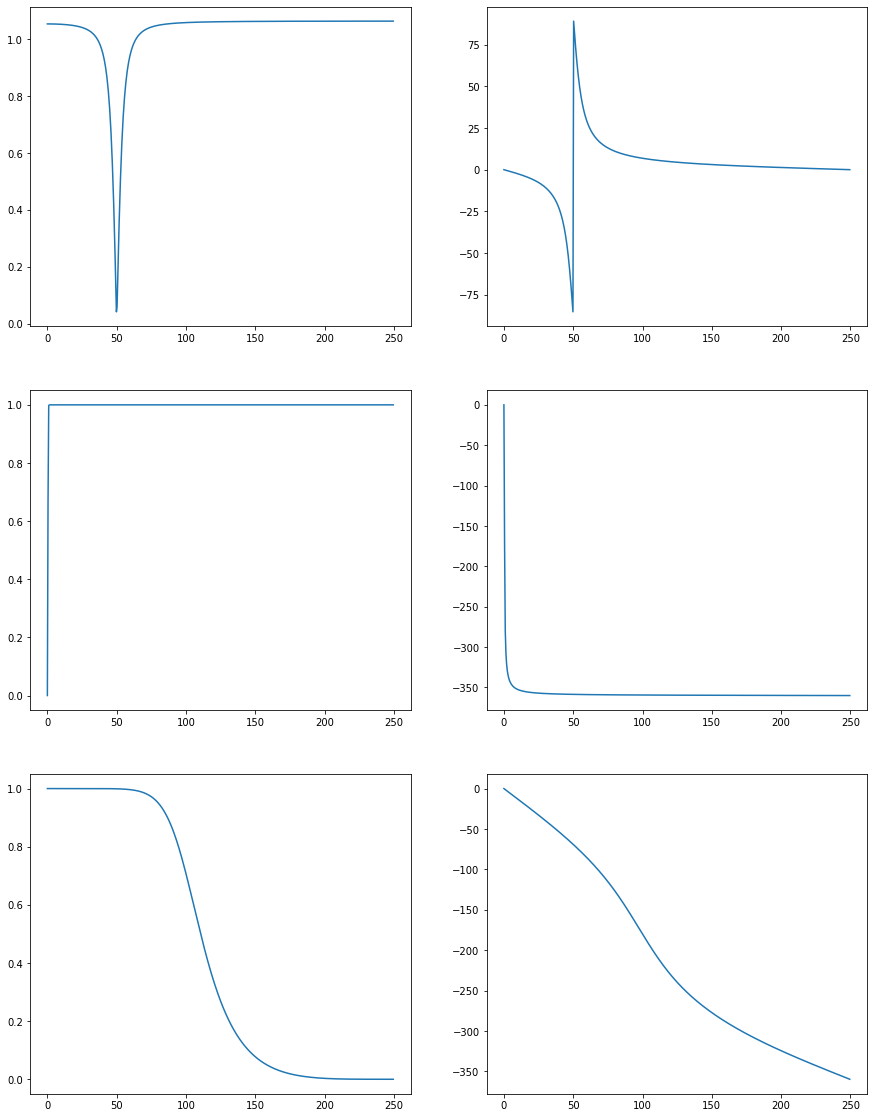

In [ ]:
fig2, axes2 = plt.subplots(3, 2,  figsize=(15, 20))

#Filtro Nortch [50 Hz]
zeros = np.exp([
  2j * np.pi * 50 * Ts,
  2j * np.pi * -50 * Ts                 
])

polos = 0.939 * np.exp([
  2j * np.pi * 50 * Ts,
  2j * np.pi * -50 * Ts                
])

sos = zpk2sos(zeros, polos, 1)
[w, h] = sosfreqz(sos)
axes2[0, 0].plot(w * Fs / (2 * np.pi), abs(h))
axes2[0, 1].plot(w * Fs / (2 * np.pi), np.rad2deg(np.unwrap(np.angle(h))))
x = sosfilt(sos, x)

#Filtro Passa Alta [0.5 Hz]
sos = iirfilter(4, 0.5,  fs=Fs, btype='highpass', output='sos', ftype='butter')
[w, h] = sosfreqz(sos) #resposta em frequência no domínio da transformada z 
axes2[1, 0].plot(w * Fs / (2 * np.pi), abs(h))
axes2[1, 1].plot(w * Fs / (2 * np.pi), np.rad2deg(np.unwrap(np.angle(h))))
x = sosfilt(sos, x)

#Filtro Passa Baixa [100 Hz]
sos = iirfilter(4, 100,  fs=Fs, btype='lowpass', output='sos', ftype='butter')
[w, h] = sosfreqz(sos)
axes2[2, 0].plot(w * Fs / (2 * np.pi), abs(h))
axes2[2, 1].plot(w * Fs / (2 * np.pi), np.rad2deg(np.unwrap(np.angle(h))))
x = sosfilt(sos, x)
plt.show()

### **Plotagem após aplicação dos filtros**

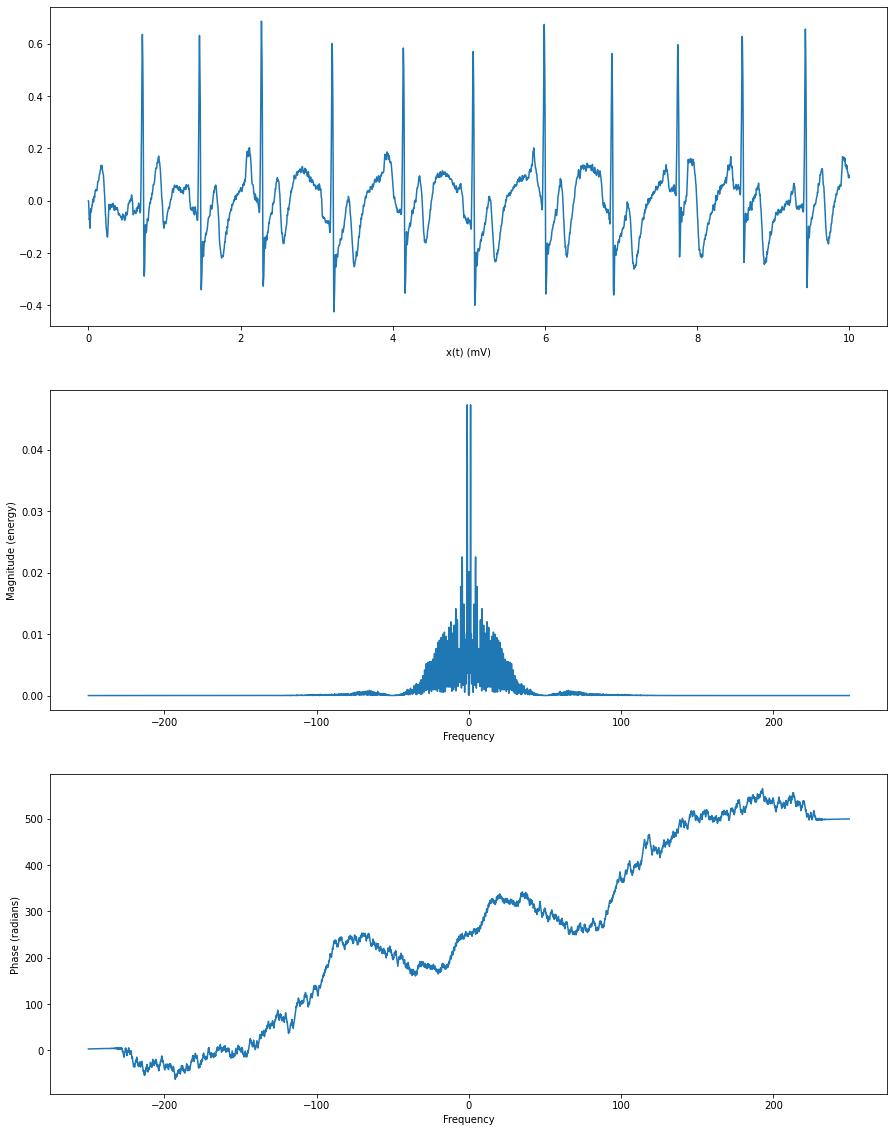

In [ ]:
fig3, axes3 = plt.subplots(3, 1, figsize=(15, 20), sharex='row', sharey='row')
axes3[0].plot(t, x)
axes3[0].set_xlabel('t(s)')
axes3[0].set_xlabel('x(t) (mV)')
axes3[1].magnitude_spectrum(x, Fs=Fs, sides = 'twosided')
axes3[2].phase_spectrum(x, Fs=Fs, sides = 'twosided')
plt.show()

### **Para comparação (Sinal bruto // Sinal filtrado )** 

In [ ]:
FILE = '/content/samplesFilter.csv'
try:
    with open(FILE) as f:
        reader = csv.reader(f)
        data = np.array(list(reader))
        labels = data[0, :]
        units = data[1, :]
        t = data[2:, 0]
        x = data[2:, 1]
except FileExistsError:
    print("Arquivo não encontrado")
t = np.vectorize(float)(t)
x = np.vectorize(float)(x)

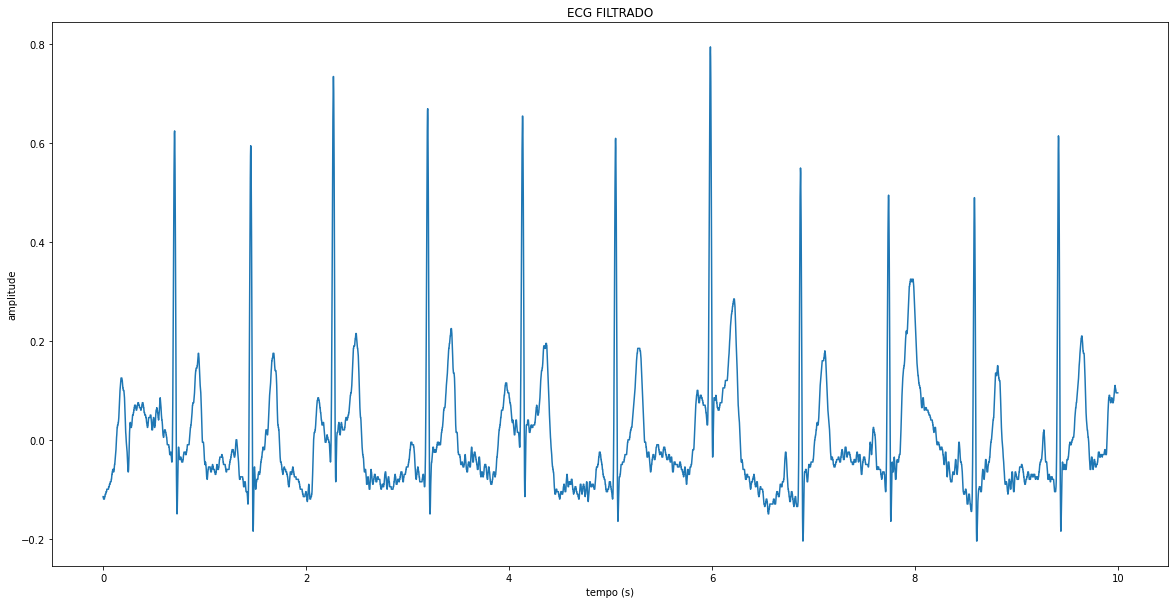

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(t, x) #GRÁFICO 
plt.xlabel('tempo (s)') # EIXO X
plt.ylabel('amplitude') # EIXO Y
plt.title('ECG FILTRADO') # TÍTULO
plt.show()

In [ ]:
Ts = t[1] - t[0] #Cálculo do período da amostragem
Fs = 1 / Ts #Frequencia (Hz)

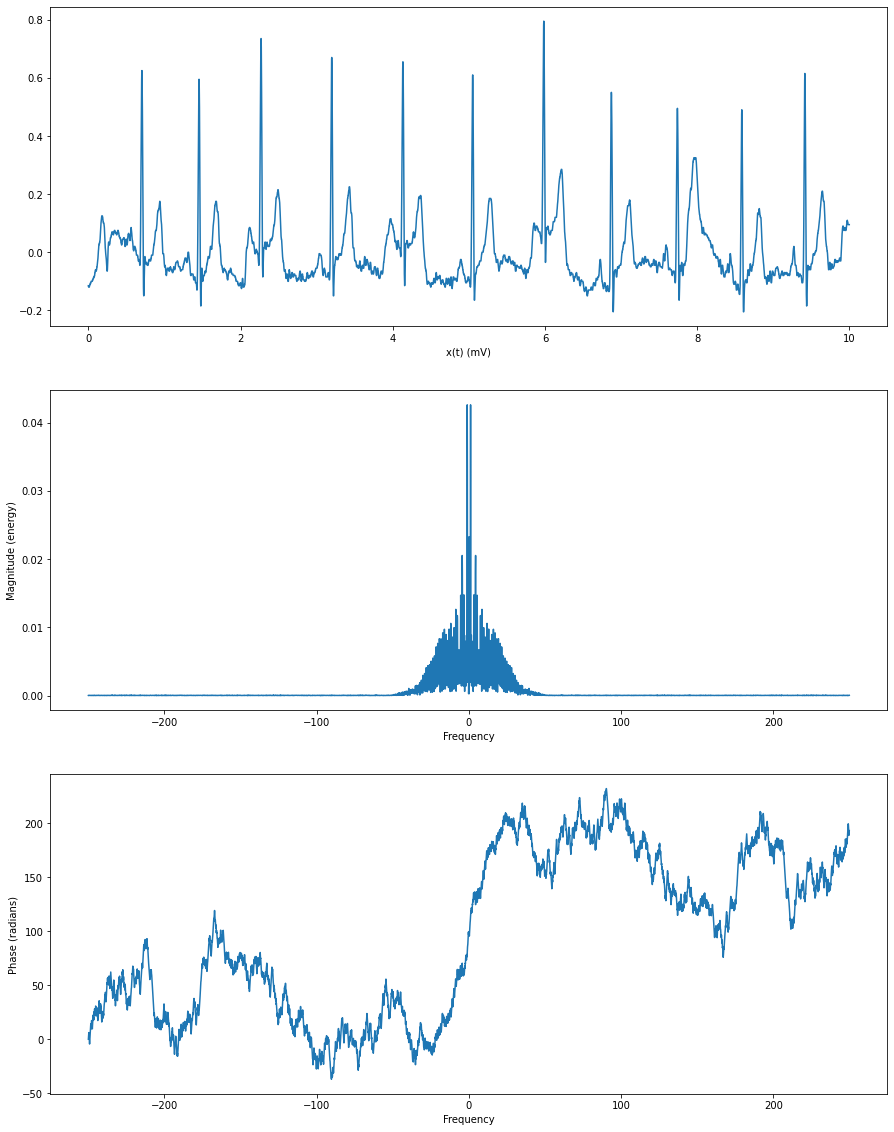

In [ ]:
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 20), sharex='row', sharey='row')
axes1[0].plot(t, x)
axes1[0].set_xlabel('t(s)')
axes1[0].set_xlabel('x(t) (mV)')
axes1[1].magnitude_spectrum(x, Fs=Fs, sides = 'twosided') #MAGNITUDE
axes1[2].phase_spectrum(x, Fs=Fs, sides = 'twosided') #ESPECTRO
plt.show()

### **Referência dos trabalhos** 

http://www.ene.unb.br/joaoluiz/pdf/adson-psb-capitulo.pdf

https://repositorio.ufsc.br/xmlui/bitstream/handle/123456789/92766/267133.pdf?sequence=1&isAllowed=y

https://repositorio.ufpb.br/jspui/bitstream/123456789/16919/1/Arquivototal.pdf

https://docs.python.org/3/library/csv.html

https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355

https://www.w3schools.com/python/matplotlib_intro.asp

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html


